In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
sys.path.append('C:/Users/nicol/anaconda3/Lib/site-packages')
import openpyxl

#check screenshot for how to import right from a url

url = "https://www.cato.org/sites/cato.org/files/2021-12/HFI2021.json"
path = "/Users/nicol/Dropbox/Programming/HumanFreedomIndexProject/HFI2021.json"

df1 = pd.read_json(path)
# df1
# print(df1)

# list all columns
cols = list(df1.columns.values)
print(cols)

# big picture stats:
df1.describe()
# df1.info()
# to iterate through all rows - keep for later, just in case
# for index, row in df1.iterrows(): 
#     print(index, row)

['year', 'countries', 'ISO', 'region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries', 'pf_ss_disappearances_torture', 'pf_ss_killings', 'pf_ss_disappearances', 'pf_ss', 'pf_movement_vdem_foreign', 'pf_movement_vdem_men', 'pf_movement_vdem_women', 'pf_movement_vdem', 'pf_movement_cld', 'pf_movement', 'pf_religion_suppression', 'pf_religion_freedom_vdem', 'pf_religion_freedom_cld', 'pf_religion_freedom', 'pf_religion', 'pf_assembly_entry', 'pf_assembly_freedom_house', 'pf_assembly_freedom_bti', 'pf_assembly_freedom_cld', 'pf_assembly_freedom', 'pf_assembly_parties_barriers', 'pf_assembly_parties_bans', 'pf_assembly_parties_auton', 'pf_assembly_parties', 'pf_assembly_civil', 'pf_assembly', 'pf_assembly_rank', 'pf_expression_killed', 'pf_expression_jailed

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
count,1980.000000,1867.000000,1867.000000,1867.000000,1249.000000,1249.000000,1249.000000,1980.000000,1976.000000,1957.000000,...,1732.000000,1845.000000,1857.000000,1911.000000,1836.000000,1853.000000,1863.000000,1880.000000,1867.000000,1867.000000
mean,2013.500000,7.190787,78.330477,2.510445,5.512842,5.532914,4.988943,5.130424,8.008148,8.469596,...,4.017979,5.293886,8.941174,5.765144,7.870626,6.935769,6.509152,7.042926,6.870279,78.237815
std,3.452925,1.176588,45.249298,1.119482,2.032690,1.330313,1.629103,1.603769,2.474640,3.049644,...,1.181790,2.562779,1.136564,2.401161,1.623539,2.028033,1.270069,1.043629,0.946626,45.265043
min,2008.000000,3.490000,1.000000,1.000000,1.000000,1.890000,1.290000,1.110000,0.000000,0.000000,...,0.000000,0.000000,0.780000,0.000000,0.000000,0.000000,1.980000,2.500000,2.670000,1.000000
25%,2010.750000,6.360000,39.000000,2.000000,4.030000,4.550000,3.720000,3.930000,7.460000,10.000000,...,3.220000,3.330000,8.660000,3.790000,7.150000,6.330000,5.710000,6.460000,6.230000,39.000000
50%,2013.500000,7.240000,78.000000,3.000000,5.130000,5.340000,4.550000,4.790000,8.985000,10.000000,...,3.985000,5.330000,9.340000,5.710000,8.240000,7.430000,6.580000,7.130000,6.980000,78.000000
75%,2016.250000,8.195000,117.000000,4.000000,7.270000,6.360000,6.160000,6.360000,9.600000,10.000000,...,4.710000,7.330000,9.660000,7.660000,9.070000,8.240000,7.360000,7.750000,7.605000,117.000000
max,2019.000000,9.150000,165.000000,4.000000,9.670000,8.770000,8.720000,8.830000,9.950000,10.000000,...,7.690000,10.000000,9.980000,10.000000,10.000000,9.930000,9.450000,9.430000,9.090000,165.000000


In [143]:
df2 = df1.sort_values("region", ascending=True)
df2[cols].dtypes

year                                   int64
countries                             object
ISO                                   object
region                                object
hf_score                             float64
                                      ...   
ef_regulation_business_compliance    float64
ef_regulation_business               float64
ef_regulation                        float64
ef_score                             float64
ef_rank                              float64
Length: 125, dtype: object

In [144]:
(df1.groupby("region")
    .mean()
    .sort_values("hf_score", ascending = False))

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
region,,,,,,,,,,,,,,,,,,,,,
North America,2013.5,8.832083,9.666667,1.000000,7.932083,6.812917,6.939583,7.229167,9.037500,10.000000,...,4.663333,8.183333,9.853750,9.243333,8.671667,8.336667,8.157917,8.707917,8.202917,6.875000
Western Europe,2013.5,8.732685,15.291667,1.000000,8.582179,7.470256,7.466218,7.821806,9.701806,9.814815,...,4.299861,7.323657,9.574413,9.103611,8.429155,8.465634,7.842315,7.789722,7.836250,24.828704
Oceania,2013.5,8.067292,43.625000,1.812500,8.505000,7.575000,7.444167,5.980833,8.964375,10.000000,...,4.432069,7.359091,9.112292,6.789792,8.517500,8.053750,7.524583,8.411042,7.472292,52.166667
Eastern Europe,2013.5,7.961133,48.570312,1.761719,6.230637,5.646667,5.145441,5.800909,9.146364,9.386973,...,3.412659,6.738945,9.456992,6.543220,7.317843,7.074453,6.771445,7.429336,7.317734,55.500000
East Asia,2013.5,7.950139,47.500000,1.708333,6.443833,6.578500,6.358667,6.525278,9.498750,8.500000,...,4.691528,7.579583,9.521389,7.110694,8.623472,7.650833,7.529444,7.645000,7.603472,45.041667
Latin America & the Caribbean,2013.5,7.474968,67.300000,2.203226,5.310741,4.944321,3.887284,4.712372,4.536378,8.974359,...,3.325828,4.930888,8.526189,5.692188,7.535472,6.040623,6.079097,6.760935,6.896419,75.329032
Caucasus & Central Asia,2013.5,6.797714,95.514286,2.914286,4.651212,5.309091,4.580303,4.380972,8.891944,9.027778,...,4.874714,5.736143,9.669429,4.507917,8.489714,6.874143,6.700714,7.294714,7.049286,71.542857
South Asia,2013.5,6.579037,105.037433,3.219251,4.251974,4.612632,4.571645,4.520539,9.082353,6.675000,...,4.309492,5.388490,8.749344,4.808906,8.041093,6.808407,6.418907,7.003194,6.673262,93.449198
Sub-Saharan Africa,2013.5,6.512516,107.069182,3.228512,3.904803,4.916339,4.076772,4.112407,7.388494,8.199627,...,4.140875,3.492916,8.352264,4.780966,7.525042,6.365252,5.833396,6.531728,6.181363,112.754717


In [145]:
# single condition:
df3 = (df1.sort_values("hf_score", ascending=False)
    .loc[df1["region"] == "Middle East & North Africa"])

df3

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
1064,2013,Israel,ISR,Middle East & North Africa,7.71,56.0,2.0,NaN,NaN,NaN,...,3.09,8.44,9.55,7.83,7.51,7.37,7.30,7.40,7.50,44.0
734,2015,Israel,ISR,Middle East & North Africa,7.67,58.0,2.0,NaN,NaN,NaN,...,4.48,8.44,9.58,7.63,7.51,7.37,7.50,7.49,7.60,42.0
569,2016,Israel,ISR,Middle East & North Africa,7.66,58.0,2.0,NaN,NaN,NaN,...,4.61,8.22,9.58,7.63,7.51,7.37,7.49,7.50,7.58,47.0
74,2019,Israel,ISR,Middle East & North Africa,7.66,62.0,2.0,NaN,NaN,NaN,...,4.22,8.22,9.62,7.45,7.65,7.38,7.42,7.42,7.63,43.0
404,2017,Israel,ISR,Middle East & North Africa,7.64,59.0,2.0,NaN,NaN,NaN,...,4.45,8.22,9.59,6.77,7.54,7.45,7.34,7.43,7.59,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,2008,Lebanon,LBN,Middle East & North Africa,NaN,NaN,NaN,6.43,4.54,4.86,...,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,NaN
1904,2008,Libya,LBY,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN,NaN,NaN
1939,2008,Qatar,QAT,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.90,NaN,NaN,NaN,NaN,NaN,NaN
1943,2008,Saudi Arabia,SAU,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.36,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#multiple conditions:
df4 = df3.loc[(df3["region"] == "Middle East & North Africa")
    & (df3["year"] == 2019)]
df4


,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
74,2019,Israel,ISR,Middle East & North Africa,7.66,62.0,2.0,NaN,NaN,NaN,...,4.22,8.22,9.62,7.45,7.65,7.38,7.42,7.42,7.63,43.0
78,2019,Jordan,JOR,Middle East & North Africa,6.91,94.0,3.0,5.00,6.21,5.68,...,4.64,5.56,9.35,5.12,9.82,8.92,7.23,7.90,7.59,50.0
86,2019,Lebanon,LBN,Middle East & North Africa,6.76,108.0,3.0,4.80,4.20,3.46,...,3.55,0.89,8.94,3.64,6.40,7.97,5.23,6.46,6.76,95.0
152,2019,Tunisia,TUN,Middle East & North Africa,6.46,116.0,3.0,4.89,5.02,4.16,...,3.18,5.11,9.68,6.85,8.74,8.39,6.99,6.46,5.97,139.0
82,2019,Kuwait,KWT,Middle East & North Africa,6.34,121.0,3.0,NaN,NaN,NaN,...,4.83,2.44,9.36,4.94,9.23,8.90,6.62,7.38,6.72,98.0
124,2019,Qatar,QAT,Middle East & North Africa,6.15,128.0,4.0,NaN,NaN,NaN,...,6.61,6.67,9.65,6.24,9.49,9.54,8.03,7.47,7.09,80.0
156,2019,United Arab Emirates,ARE,Middle East & North Africa,6.06,131.0,4.0,5.12,6.75,6.74,...,7.03,6.22,9.69,7.17,10.00,8.70,8.13,7.51,7.28,68.0
115,2019,Oman,OMN,Middle East & North Africa,5.92,133.0,4.0,NaN,NaN,NaN,...,5.66,5.78,9.82,6.55,8.88,9.24,7.65,7.28,6.69,102.0
103,2019,Morocco,MAR,Middle East & North Africa,5.90,134.0,4.0,3.27,5.37,3.79,...,5.23,6.00,9.67,4.29,9.97,8.26,7.24,6.99,6.69,102.0
153,2019,Turkey,TUR,Middle East & North Africa,5.79,139.0,4.0,3.39,4.43,3.77,...,4.41,5.33,9.71,1.74,9.28,8.09,6.43,5.82,6.54,114.0


In [147]:
# dfme = (df1.loc[df1["region"] == "Middle East & North Africa"]
#     .sort_values("hf_score", ascending=False)
#         .drop(columns=['region']))
#     # .groupby(["countries"]).mean())

dfme = (df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
       .loc[df2["region"] == "Middle East & North Africa"]
       .sort_values(["year", "hf_score"], ascending=False))
dfme

,year,countries,region,hf_score,hf_rank,pf_score,ef_score
74,2019,Israel,Middle East & North Africa,7.66,62.0,7.69,7.63
78,2019,Jordan,Middle East & North Africa,6.91,94.0,6.42,7.59
86,2019,Lebanon,Middle East & North Africa,6.76,108.0,6.76,6.76
152,2019,Tunisia,Middle East & North Africa,6.46,116.0,6.82,5.97
82,2019,Kuwait,Middle East & North Africa,6.34,121.0,6.07,6.72
...,...,...,...,...,...,...,...
1901,2008,Lebanon,Middle East & North Africa,NaN,NaN,6.14,NaN
1904,2008,Libya,Middle East & North Africa,NaN,NaN,4.74,NaN
1939,2008,Qatar,Middle East & North Africa,NaN,NaN,5.20,NaN
1943,2008,Saudi Arabia,Middle East & North Africa,NaN,NaN,3.72,NaN


In [148]:
(df3.sort_values("hf_score", ascending=False).groupby(["year"]).mean())

,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
year,,,,,,,,,,,,,,,,,,,,,
2008,6.083077,114.461538,3.615385,4.361250,5.548750,4.942500,4.948421,9.175789,8.157895,8.406316,...,4.066667,4.758000,8.962308,4.363158,7.659231,7.431538,6.373846,6.769231,6.539231,85.307692
2009,6.065385,113.846154,3.538462,4.361250,5.548750,4.942500,4.953158,9.307895,7.894737,8.307895,...,3.866154,4.758000,9.110000,4.360526,7.774615,7.541538,6.360769,6.800769,6.494615,88.923077
2010,6.037059,122.647059,3.588235,4.361250,5.548750,4.942500,4.962632,9.284211,8.157895,8.804737,...,4.040000,5.033333,9.238235,4.369474,8.240000,7.830588,6.551765,6.902353,6.591765,90.588235
2011,5.968824,123.176471,3.588235,4.361250,5.548750,4.942500,4.895263,9.272105,4.736842,7.150000,...,4.196471,5.033333,9.217059,4.162632,8.171765,7.844118,6.535882,6.837647,6.614706,92.000000
2012,5.922353,123.294118,3.588235,4.213750,5.223750,4.677500,4.771053,9.256316,7.631579,7.690526,...,4.190000,4.048889,9.201176,4.286316,8.235000,7.847059,6.336471,6.847059,6.515882,94.705882
2013,5.821667,128.277778,3.666667,3.867500,5.221250,4.612500,4.696842,9.216842,7.631579,8.297895,...,4.198333,4.048889,9.182778,4.115789,8.585625,7.401111,6.190556,6.780556,6.426111,100.055556
2014,5.736111,130.888889,3.666667,3.840000,5.233750,4.655000,4.668947,9.250000,4.736842,6.703684,...,4.282222,4.048889,9.225000,4.108421,8.669375,7.455000,6.229444,6.698889,6.432222,102.777778
2015,5.653333,131.166667,3.666667,4.197500,5.178750,4.663750,4.665263,9.278421,6.842105,6.902105,...,4.390556,3.999444,9.250556,4.113684,8.776250,7.558889,6.272222,6.516667,6.350556,106.222222
2016,5.640000,133.789474,3.736842,4.197500,5.178750,4.663750,4.574211,9.271579,7.631579,6.927368,...,4.410556,3.695789,9.253684,4.226316,8.693750,7.556316,6.180000,6.546316,6.375789,107.315789


In [149]:
dfscores = (df1[['year', 'countries', 'hf_score', 'ef_score', 'pf_score']]
    .groupby(["countries"]).mean()
    .sort_values("hf_score", ascending=False))
dfscores

,year,hf_score,ef_score,pf_score
countries,,,,
New Zealand,2013.5,9.081667,8.487500,9.502500
Switzerland,2013.5,9.075833,8.470000,9.510000
Denmark,2013.5,8.987500,8.068333,9.642500
Ireland,2013.5,8.905833,8.126667,9.464167
Australia,2013.5,8.904167,8.180000,9.420000
...,...,...,...,...
"Egypt, Arab Rep.",2013.5,4.786667,5.674167,4.153333
"Venezuela, RB",2013.5,4.748333,3.333333,5.761667
"Iran, Islamic Rep.",2013.5,4.739167,5.414167,4.256667


In [150]:
# worldwide averages

(df1[['year', 'countries', 'hf_score', 'ef_score', 'pf_score']]
    .groupby(["year"]).mean()
    .sort_values("hf_score", ascending=False))


,hf_score,ef_score,pf_score
year,,,
2008,7.302837,6.818369,7.354512
2009,7.287163,6.823191,7.332256
2011,7.239804,6.854967,7.376606
2010,7.236601,6.821307,7.391333
2012,7.222092,6.856405,7.355152
2013,7.181911,6.853057,7.312970
2014,7.173899,6.891069,7.285818
2018,7.151420,6.922531,7.270182
2015,7.150629,6.881069,7.254424


In [151]:
dfmedia = df1.loc[(df1["pf_expression_internet"] > 9) & (df1["pf_expression_media"] > 9)]
dfmedia

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
11,2019,Barbados,BRB,Latin America & the Caribbean,7.92,51.0,2.0,7.28,6.43,5.74,...,3.26,6.89,9.41,7.44,5.00,7.30,6.55,7.62,6.91,87.0
13,2019,Belgium,BEL,Western Europe,8.61,23.0,1.0,8.80,7.59,7.07,...,3.50,8.44,9.78,9.53,7.46,8.48,7.87,8.12,7.62,45.0
25,2019,Cabo Verde,CPV,Sub-Saharan Africa,8.26,36.0,1.0,NaN,NaN,NaN,...,4.53,6.00,9.58,6.40,9.27,7.98,7.29,7.33,7.65,41.0
28,2019,Canada,CAN,North America,8.85,6.0,1.0,8.71,7.04,7.41,...,4.83,8.00,9.95,8.55,6.85,8.53,7.79,8.62,8.06,14.0
31,2019,Chile,CHL,Latin America & the Caribbean,8.44,28.0,1.0,7.68,6.31,5.60,...,4.02,7.78,9.84,7.46,7.74,6.68,7.25,7.03,7.85,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2008,Sweden,SWE,Western Europe,8.83,11.0,1.0,9.50,7.78,8.23,...,4.99,1.92,9.42,9.65,8.84,8.63,7.24,7.46,7.70,26.0
1958,2008,Switzerland,CHE,Western Europe,9.07,2.0,1.0,NaN,NaN,NaN,...,5.46,7.79,9.25,9.52,8.32,9.29,8.27,8.49,8.41,4.0
1966,2008,Trinidad and Tobago,TTO,Latin America & the Caribbean,7.47,63.0,2.0,NaN,NaN,NaN,...,3.95,5.35,8.62,6.50,6.65,8.72,6.63,7.48,7.26,53.0
1973,2008,United States,USA,North America,8.87,7.0,1.0,7.27,6.53,6.54,...,3.99,7.01,9.80,9.50,9.98,7.90,8.03,8.69,8.37,5.0


In [152]:
dfmedia[dfmedia.columns[0:5]].dropna()

,year,countries,ISO,region,hf_score
11,2019,Barbados,BRB,Latin America & the Caribbean,7.92
13,2019,Belgium,BEL,Western Europe,8.61
25,2019,Cabo Verde,CPV,Sub-Saharan Africa,8.26
28,2019,Canada,CAN,North America,8.85
31,2019,Chile,CHL,Latin America & the Caribbean,8.44
...,...,...,...,...,...
1957,2008,Sweden,SWE,Western Europe,8.83
1958,2008,Switzerland,CHE,Western Europe,9.07
1966,2008,Trinidad and Tobago,TTO,Latin America & the Caribbean,7.47
1973,2008,United States,USA,North America,8.87


In [153]:
dfmedia[['year', 'countries', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_expression_killed', 'pf_expression_jailed', 'pf_expression_media', 'pf_expression_cultural', 
    'pf_expression_gov', 'pf_expression_internet', 'pf_expression_harass', 'pf_expression_selfcens', 'pf_expression_freedom_bti', 'pf_expression_freedom_cld', 
    'pf_expression_freedom', 'pf_expression', 'pf_expression_rank', 'pf_score', 'pf_rank']].dropna()

,year,countries,hf_score,hf_rank,hf_quartile,pf_expression_killed,pf_expression_jailed,pf_expression_media,pf_expression_cultural,pf_expression_gov,pf_expression_internet,pf_expression_harass,pf_expression_selfcens,pf_expression_freedom_bti,pf_expression_freedom_cld,pf_expression_freedom,pf_expression,pf_expression_rank,pf_score,pf_rank
31,2019,Chile,8.44,28.0,1.0,10.0,10.0,10.0,8.89,7.51,9.69,7.07,6.98,10.0,10.0,10.00,8.90,26,8.86,31.0
37,2019,Costa Rica,8.25,37.0,1.0,10.0,10.0,10.0,9.41,9.02,9.92,6.99,9.27,10.0,10.0,10.00,9.40,13,8.66,38.0
48,2019,Estonia,8.91,4.0,1.0,10.0,10.0,10.0,8.65,9.78,9.90,8.83,7.50,10.0,10.0,10.00,9.41,12,9.48,6.0
76,2019,Jamaica,7.91,52.0,2.0,10.0,10.0,10.0,9.43,8.85,9.91,6.76,8.86,10.0,10.0,10.00,9.31,17,8.06,57.0
90,2019,Lithuania,8.68,19.0,1.0,10.0,10.0,10.0,8.04,8.11,9.89,9.07,8.86,9.0,7.5,8.25,9.13,20,9.01,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2008,Jamaica,7.57,60.0,2.0,10.0,10.0,10.0,9.43,8.85,9.91,6.24,7.48,10.0,7.5,8.75,8.96,32,7.87,65.0
1905,2008,Lithuania,8.27,36.0,2.0,10.0,10.0,10.0,9.34,9.48,9.89,8.11,8.81,10.0,7.5,8.75,9.38,19,8.83,35.0
1937,2008,Poland,8.44,29.0,1.0,10.0,10.0,10.0,9.58,9.57,9.71,8.90,9.52,10.0,7.5,8.75,9.56,12,9.41,10.0
1949,2008,Slovak Republic,8.48,28.0,1.0,10.0,10.0,10.0,9.04,8.81,9.87,6.45,8.67,10.0,10.0,10.00,9.20,29,9.01,31.0


In [154]:
# find out if any countries have dropped enough in score to skew the worldwide mean so that it looks like a slight downward trend

    # this section is me trying to figure out how to isolate the 2018 and 2019 hf_score values
    # the next section is me trying to find the difference between them

# dfdec = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#     .loc[((df1["pf_score"] < 5) & ((df1["year"] == 2019) | (df1["year"] == 2018)))
#          | ((df1["ef_score"] < 5) & ((df1["year"] == 2019) | (df1["year"] == 2018)))].sort_values("countries")))
# dfdec


# df2019 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#           .loc[((df1["pf_score"] < 5) & (df1["year"] == 2019))
#                | ((df1["ef_score"] < 5) & (df1["year"] == 2019))].sort_values("countries")))
# df2019

# df2018 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#            .loc[((df1["pf_score"] < 5) & (df1["year"] == 2018))
#                | ((df1["ef_score"] < 5) & (df1["year"] == 2018))].sort_values("countries")))
# df2018


df2019 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
           .loc[(df1["year"] == 2019)]
             .sort_values("countries")))
df2019

df2018 = ((df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
           .loc[(df1["year"] == 2018)]
             .sort_values("countries")))
df2018


,year,countries,region,hf_score,hf_rank,pf_score,ef_score
165,2018,Albania,Eastern Europe,8.16,42.0,8.43,7.78
166,2018,Algeria,Middle East & North Africa,5.21,152.0,5.48,4.83
167,2018,Angola,Sub-Saharan Africa,5.80,136.0,6.48,4.86
168,2018,Argentina,Latin America & the Caribbean,7.57,65.0,8.77,5.88
169,2018,Armenia,Caucasus & Central Asia,8.01,47.0,8.06,7.94
...,...,...,...,...,...,...,...
325,2018,"Venezuela, RB",Latin America & the Caribbean,4.25,159.0,4.93,3.31
326,2018,Vietnam,South Asia,5.91,131.0,5.68,6.24
327,2018,"Yemen, Rep.",Middle East & North Africa,4.07,160.0,3.10,5.44
328,2018,Zambia,Sub-Saharan Africa,7.00,93.0,6.85,7.20


In [155]:
# continued from above: trying to find the differnce between the 2019 and 2018 hf_scores.

#  dfdec2 = ((dfdec[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
#     .loc[(dfdec["pf_score"])].where(dfdec["year"] == 2019)
#     .sort_values("countries")))

# dfdec2

dfdec = (df1[['year', 'countries', 'region', 'hf_score', 'hf_rank', 'pf_score', 'ef_score']]
         .loc[(df1["year"] == 2018) | (df1["year"] == 2019)]
        .sort_values("countries"))
# dfdec["hf_diff"] = df2019["hf_score"] - df2018["hf_score"]

dfdec["hf2019"] = df2019["hf_score"]
dfdec["hf2018"] = df2018["hf_score"]
dfdec["hfdiff"] = dfdec["hf2019"] - df2018["hf_score"]

# dfdec.groupby("countries")
# dfdec

dfdec = (dfdec[['countries', 'region', 'hf_score', 'hf_rank',
                'pf_score', 'ef_score', 'hf2019', 'hf2018', 'hfdiff']])
dfdec


,countries,region,hf_score,hf_rank,pf_score,ef_score,hf2019,hf2018,hfdiff
0,Albania,Eastern Europe,8.14,43.0,8.38,7.81,8.14,NaN,NaN
165,Albania,Eastern Europe,8.16,42.0,8.43,7.78,NaN,8.16,NaN
166,Algeria,Middle East & North Africa,5.21,152.0,5.48,4.83,NaN,5.21,NaN
1,Algeria,Middle East & North Africa,5.26,154.0,5.51,4.90,5.26,NaN,NaN
2,Angola,Sub-Saharan Africa,6.09,129.0,6.50,5.50,6.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...
162,"Yemen, Rep.",Middle East & North Africa,4.08,163.0,3.11,5.45,4.08,NaN,NaN
328,Zambia,Sub-Saharan Africa,7.00,93.0,6.85,7.20,NaN,7.00,NaN
163,Zambia,Sub-Saharan Africa,6.82,102.0,6.62,7.09,6.82,NaN,NaN
164,Zimbabwe,Sub-Saharan Africa,5.60,149.0,6.07,4.94,5.60,NaN,NaN


In [156]:
# figure out the transpose function to switch columns and rows?


In [157]:
#show list of Middle Eastern country names for the line graph in the next section
dfme.groupby("countries").mean()

,year,hf_score,hf_rank,pf_score,ef_score
countries,,,,,
Algeria,2013.5,5.238333,147.583333,5.400833,5.009167
Bahrain,2013.5,5.821667,133.416667,4.850833,7.180833
"Egypt, Arab Rep.",2013.5,4.786667,151.250000,4.153333,5.674167
"Iran, Islamic Rep.",2013.5,4.739167,152.583333,4.256667,5.414167
Iraq,2013.5,5.025000,154.500000,4.609167,5.587500
Israel,2013.5,7.574167,62.833333,7.650000,7.470833
Jordan,2013.5,6.852500,98.666667,6.420833,7.459167
Kuwait,2013.5,6.352500,117.083333,6.082500,6.730000
Lebanon,2013.5,6.836000,100.600000,6.580000,7.084000


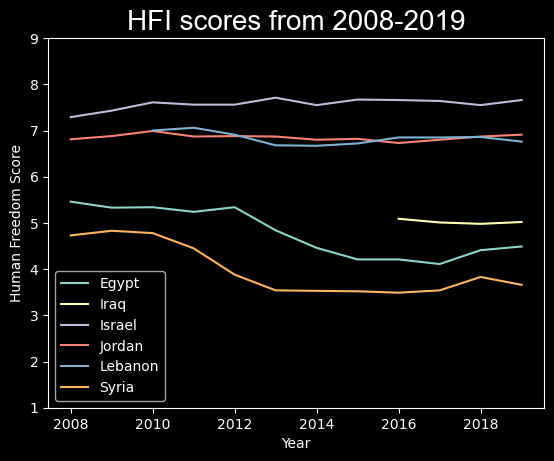

In [158]:
# plot ME countries

dfmeE = (dfme[["year", "countries", "hf_score"]]
    .loc[(dfme["countries"] == "Egypt, Arab Rep.")])

dfmeI = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Israel")])

dfmeJ = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Jordan")])

dfmeL = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Lebanon")])

dfmeS = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Syrian Arab Republic")])

dfmeIR = (dfme[["year", "countries", "hf_score"]]
         .loc[(dfme["countries"] == "Iraq")])

xE = dfmeE["year"]
yE = dfmeE["hf_score"]
xIR = dfmeIR["year"]
yIR = dfmeIR["hf_score"]
xI = dfmeI["year"]
yI = dfmeI["hf_score"]
xJ = dfmeJ["year"]
yJ = dfmeJ["hf_score"]
xL = dfmeL["year"]
yL = dfmeL["hf_score"]
xS = dfmeS["year"]
yS = dfmeS["hf_score"]

plt.plot(xE, yE, label="Egypt")
plt.plot(xIR, yIR, label="Iraq")
plt.plot(xI, yI, label="Israel")
plt.plot(xJ, yJ, label="Jordan")
plt.plot(xL, yL, label="Lebanon")
plt.plot(xS, yS, label="Syria")

plt.title("HFI scores from 2008-2019", fontdict = {"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([1,2,3,4,5,6,7,8,9])
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.savefig('mehfiline.png', dpi=300)

plt.show()


In [180]:
dfme[["year", "countries", "hf_score"]]

,year,countries,hf_score
74,2019,Israel,7.66
78,2019,Jordan,6.91
86,2019,Lebanon,6.76
152,2019,Tunisia,6.46
82,2019,Kuwait,6.34
...,...,...,...
1901,2008,Lebanon,NaN
1904,2008,Libya,NaN
1939,2008,Qatar,NaN
1943,2008,Saudi Arabia,NaN


No handles with labels found to put in legend.


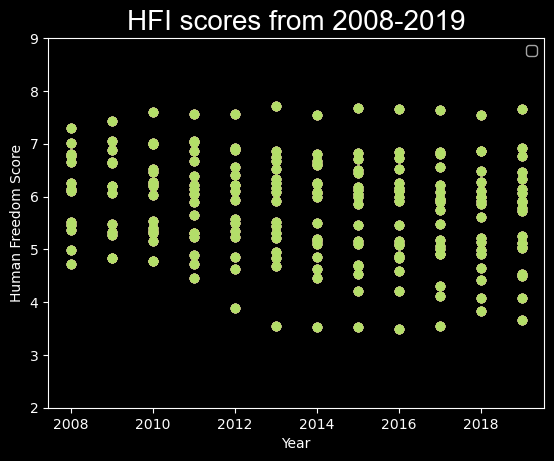

In [186]:
# plot ME countries

country = ["Algeria", "Bahrain", "Egypt, Arab Rep.", "Iran, Islamic Rep.", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Libya", "Morocco", "Oman", 
    "Qatar", "Saudi Arabia", "Syrian Arab Republic", "Tunisia", "Turkey", "United Arab Emirates", "Yemen, Rep."]

for countries in dfme:
    x = dfme["year"]
    y = dfme["hf_score"]
    plt.scatter(x, y, label=country)

plt.title("HFI scores from 2008-2019", fontdict = {"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([2,3,4,5,6,7,8,9])
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.savefig('mehfiline2.png', dpi=300)

plt.show()


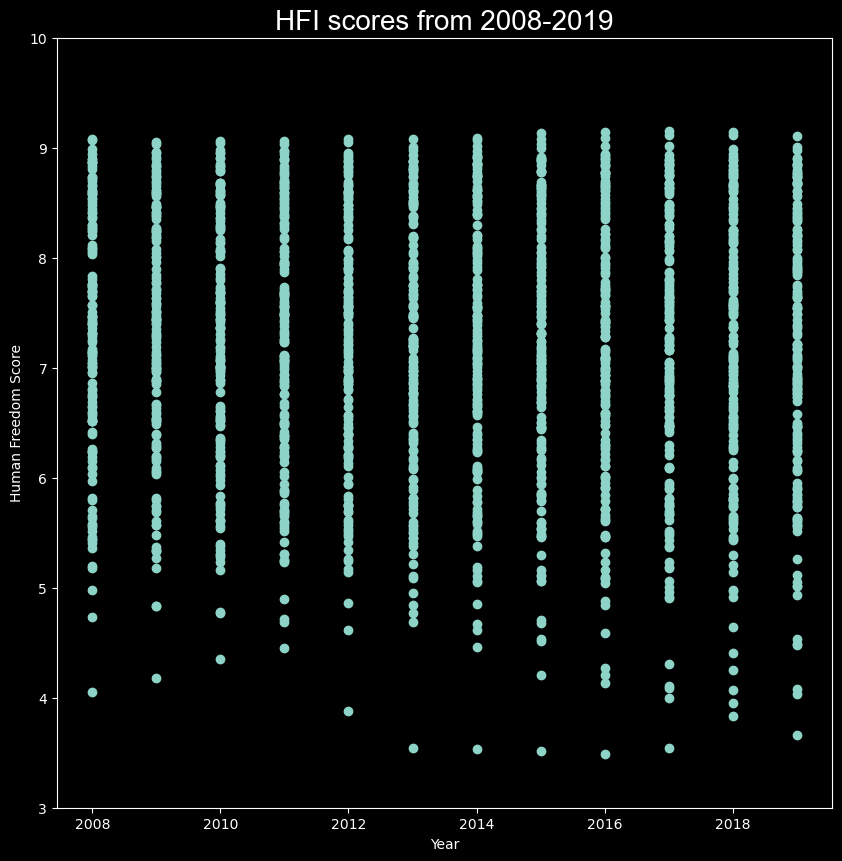

In [161]:
# this is interesting. Try a box and whisker chart to follow up on the lower outliers.

plt.scatter(df1["year"], df1["hf_score"])

plt.title("HFI scores from 2008-2019",
          fontdict={"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([3, 4, 5, 6, 7, 8, 9, 10])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.savefig('hfiscatter.png', dpi=300)

plt.show()


In [162]:
#list regions for below plot:
 
dfregion_mean = (df1[["year", "countries", "region", "hf_score"]].groupby("region").mean())


# dfregion = (df1[["year", "countries", "region", "hf_score"]]
#     .sort_values(["year", "hf_score"], ascending=False)
#             .loc[(df1["region"] == "Caucasus & Central Asia")])
dfregion = (df1[["year", "countries", "region", "hf_score"]]
            .sort_values(["year", "hf_score"], ascending=False)
            .groupby(["region", "year"]).mean())
dfregion

hf_score
region                  year          
Caucasus & Central Asia 2008  6.864000
                        2009  6.774000
                        2010  6.640000
                        2011  6.628333
                        2012  6.696667
...                                ...
Western Europe          2015  8.753889
                        2016  8.753889
                        2017  8.740556
                        2018  8.731667
                        2019  8.726111

[120 rows x 1 columns]

No handles with labels found to put in legend.


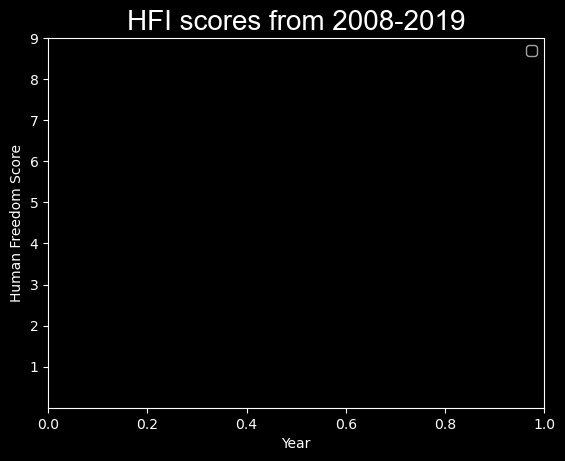

In [163]:
# plot ME countries

# dfregion_cca = (dfregion[["hf_score"]]
#     .loc[(dfregion["region"] == "Caucasus & Central Asia")])

# fig, ax = plt.subplots(figsize=(8,6))
# for label, df in p_df.groupby('class'):
#     df.vals.plot(kind="kde", ax=ax, label=label)

# for region in dfregion:
# dfregion.plot(kind = "line", ax = plt.gca())

# dfregion.plot(kind='line', ax=plt.gca())


# x_cca = dfregion_cca["year"]
# y_cca = dfregion_cca["hf_score"]

# plt.plot(x_cca, y_cca, label="Caucasus & Central Asia")


plt.title("HFI scores from 2008-2019", fontdict = {"fontname": "Arial", "fontsize": 20})
plt.xlabel("Year")
plt.ylabel("Human Freedom Score")

# plt.xticks([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.yticks([1,2,3,4,5,6,7,8,9])
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.savefig('hfiline.png', dpi=300)

plt.show()


In [164]:
# insert columns for evaluations e.g. "very free", "not free"


In [165]:
# Save and export:

# df3.to_csv("writers.csv", index = False)
df4.to_excel("df4.xlsx", index=False)
df5.to_excel("df5.xlsx", index=False)
# df4.to_csv("df4.txt", index = False, sep = "\t")


NameError: name 'df5' is not defined